In [1]:
from src.data_eng.datarequest import Series_requests
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from src.analytics.serie_decomposer import Serie_Decomposer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
code = [20541, 433, 24369, 29037, 21084, 4390, 4380, 25435, 24363, 20854]
start = '01/03/2012'
end = '31/12/2025'
data_req = Series_requests(code, start, end)
data = data_req.get_data()
df = data_req.concat()

codigo 20541
<class 'int'>
iterando sobre o codigo: 20541
saida da api:200
(165, 1)
codigo 433
<class 'int'>
iterando sobre o codigo: 433
saida da api:200
(166, 1)
codigo 24369
<class 'int'>
iterando sobre o codigo: 24369
saida da api:200
(165, 1)
codigo 29037
<class 'int'>
iterando sobre o codigo: 29037
saida da api:200
(164, 1)
codigo 21084
<class 'int'>
iterando sobre o codigo: 21084
saida da api:200
(165, 1)
codigo 4390
<class 'int'>
iterando sobre o codigo: 4390
saida da api:200
(166, 1)
codigo 4380
<class 'int'>
iterando sobre o codigo: 4380
saida da api:200
(166, 1)
codigo 25435
<class 'int'>
iterando sobre o codigo: 25435
saida da api:200
(165, 1)
codigo 24363
<class 'int'>
iterando sobre o codigo: 24363
saida da api:200
(165, 1)
codigo 20854
<class 'int'>
iterando sobre o codigo: 20854
saida da api:200
(165, 1)
                20541  433    24369  29037  21084  4390       4380   25435  \
data                                                                         
2012-03-01  

In [3]:
df.head()

,20541,433,24369,29037,21084,4390,4380,25435,24363,20854
data,,,,,,,,,,
2012-03-01,953171.0,0.21,8.0,36.87,5.36,0.82,397757.8,2.53,102.72490,105.95
2012-04-01,964854.0,0.64,7.8,36.99,5.41,0.71,385882.7,2.49,98.16340,106.70
2012-05-01,980828.0,0.36,7.7,37.21,5.51,0.74,401863.7,2.36,101.46906,108.51
2012-06-01,994137.0,0.08,7.6,37.42,5.43,0.64,395379.2,2.31,99.86712,110.43
2012-07-01,1004184.0,0.43,7.5,37.54,5.42,0.68,409024.9,2.26,103.50475,111.51


In [4]:
df = df.rename(columns={20541:'Saldo da carteira de crédito',
                        433:'IPCA',
                        24369:'Taxa de desocupação (PNADC)',
                        29037:'Endividamento das famílias(RNDBF) ',
                        21084: 'Inadimplência da carteira de crédito',
                        4390: 'Selic (M)',
                        4380: 'PIB (M)',
                        25435:'Taxa média mensal de juros não rotativo',
                        24363: 'IBC-BR',
                        20854: 'Prazo médio das concessões de crédito'
                        }, errors='raise')

In [5]:
df

,Saldo da carteira de crédito,IPCA,Taxa de desocupação (PNADC),Endividamento das famílias(RNDBF),Inadimplência da carteira de crédito,Selic (M),PIB (M),Taxa média mensal de juros não rotativo,IBC-BR,Prazo médio das concessões de crédito
data,,,,,,,,,,
2012-03-01,953171.0,0.21,8.0,36.87,5.36,0.82,397757.8,2.53,102.72490,105.95
2012-04-01,964854.0,0.64,7.8,36.99,5.41,0.71,385882.7,2.49,98.16340,106.70
2012-05-01,980828.0,0.36,7.7,37.21,5.51,0.74,401863.7,2.36,101.46906,108.51
2012-06-01,994137.0,0.08,7.6,37.42,5.43,0.64,395379.2,2.31,99.86712,110.43
2012-07-01,1004184.0,0.43,7.5,37.54,5.42,0.68,409024.9,2.26,103.50475,111.51
...,...,...,...,...,...,...,...,...,...,...
2025-08-01,4226068.0,-0.11,5.6,48.93,4.79,1.16,1066136.7,2.62,110.48903,179.72
2025-09-01,4259790.0,0.48,5.6,49.07,4.75,1.22,1074308.9,2.61,109.54869,180.80
2025-10-01,4314455.0,0.09,5.4,49.32,4.69,1.28,1103439.2,2.62,109.90366,182.05


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166 entries, 2012-03-01 to 2025-12-01
Freq: MS
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Saldo da carteira de crédito             165 non-null    float64
 1   IPCA                                     166 non-null    float64
 2   Taxa de desocupação (PNADC)              165 non-null    float64
 3   Endividamento das famílias(RNDBF)        164 non-null    float64
 4   Inadimplência da carteira de crédito     165 non-null    float64
 5   Selic (M)                                166 non-null    float64
 6   PIB (M)                                  166 non-null    float64
 7   Taxa média mensal de juros não rotativo  165 non-null    float64
 8   IBC-BR                                   165 non-null    float64
 9   Prazo médio das concessões de crédito    165 non-null    float64
dtypes: float64(10)
memory 

In [7]:
describe = df.describe().T
print('===='*50)
print('desvio padrao')
print()
print(describe['std'])
print('===='*50)
print('media')
print(describe['mean'])
print('===='*50)

desvio padrao

Saldo da carteira de crédito               961664.280221
IPCA                                            0.373495
Taxa de desocupação (PNADC)                     2.768702
Endividamento das famílias(RNDBF)               4.593035
Inadimplência da carteira de crédito            0.591088
Selic (M)                                       0.296885
PIB (M)                                    205013.623002
Taxa média mensal de juros não rotativo         0.298201
IBC-BR                                          5.433736
Prazo médio das concessões de crédito          18.454284
Name: std, dtype: float64
media
Saldo da carteira de crédito               2.181196e+06
IPCA                                       4.637952e-01
Taxa de desocupação (PNADC)                9.764848e+00
Endividamento das famílias(RNDBF)          4.212598e+01
Inadimplência da carteira de crédito       3.899333e+00
Selic (M)                                  7.657229e-01
PIB (M)                                    6.66

In [8]:
for coef in df.columns:
    print(f'coeficiente de variação | coluna: {coef}: {np.round(df[coef].std()/df[coef].mean(), 3) *100} %')

coeficiente de variação | coluna: Saldo da carteira de crédito: 44.1 %
coeficiente de variação | coluna: IPCA: 80.5 %
coeficiente de variação | coluna: Taxa de desocupação (PNADC): 28.4 %
coeficiente de variação | coluna: Endividamento das famílias(RNDBF) : 10.9 %
coeficiente de variação | coluna: Inadimplência da carteira de crédito: 15.2 %
coeficiente de variação | coluna: Selic (M): 38.800000000000004 %
coeficiente de variação | coluna: PIB (M): 30.8 %
coeficiente de variação | coluna: Taxa média mensal de juros não rotativo: 12.7 %
coeficiente de variação | coluna: IBC-BR: 5.4 %
coeficiente de variação | coluna: Prazo médio das concessões de crédito: 11.4 %


coef < 15% = menor variaçao 

coef > 15% = variaçao significativa 

coef > 30% = grande variação 

C:\Users\souza\AppData\Local\Temp\ipykernel_19696\3599311849.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


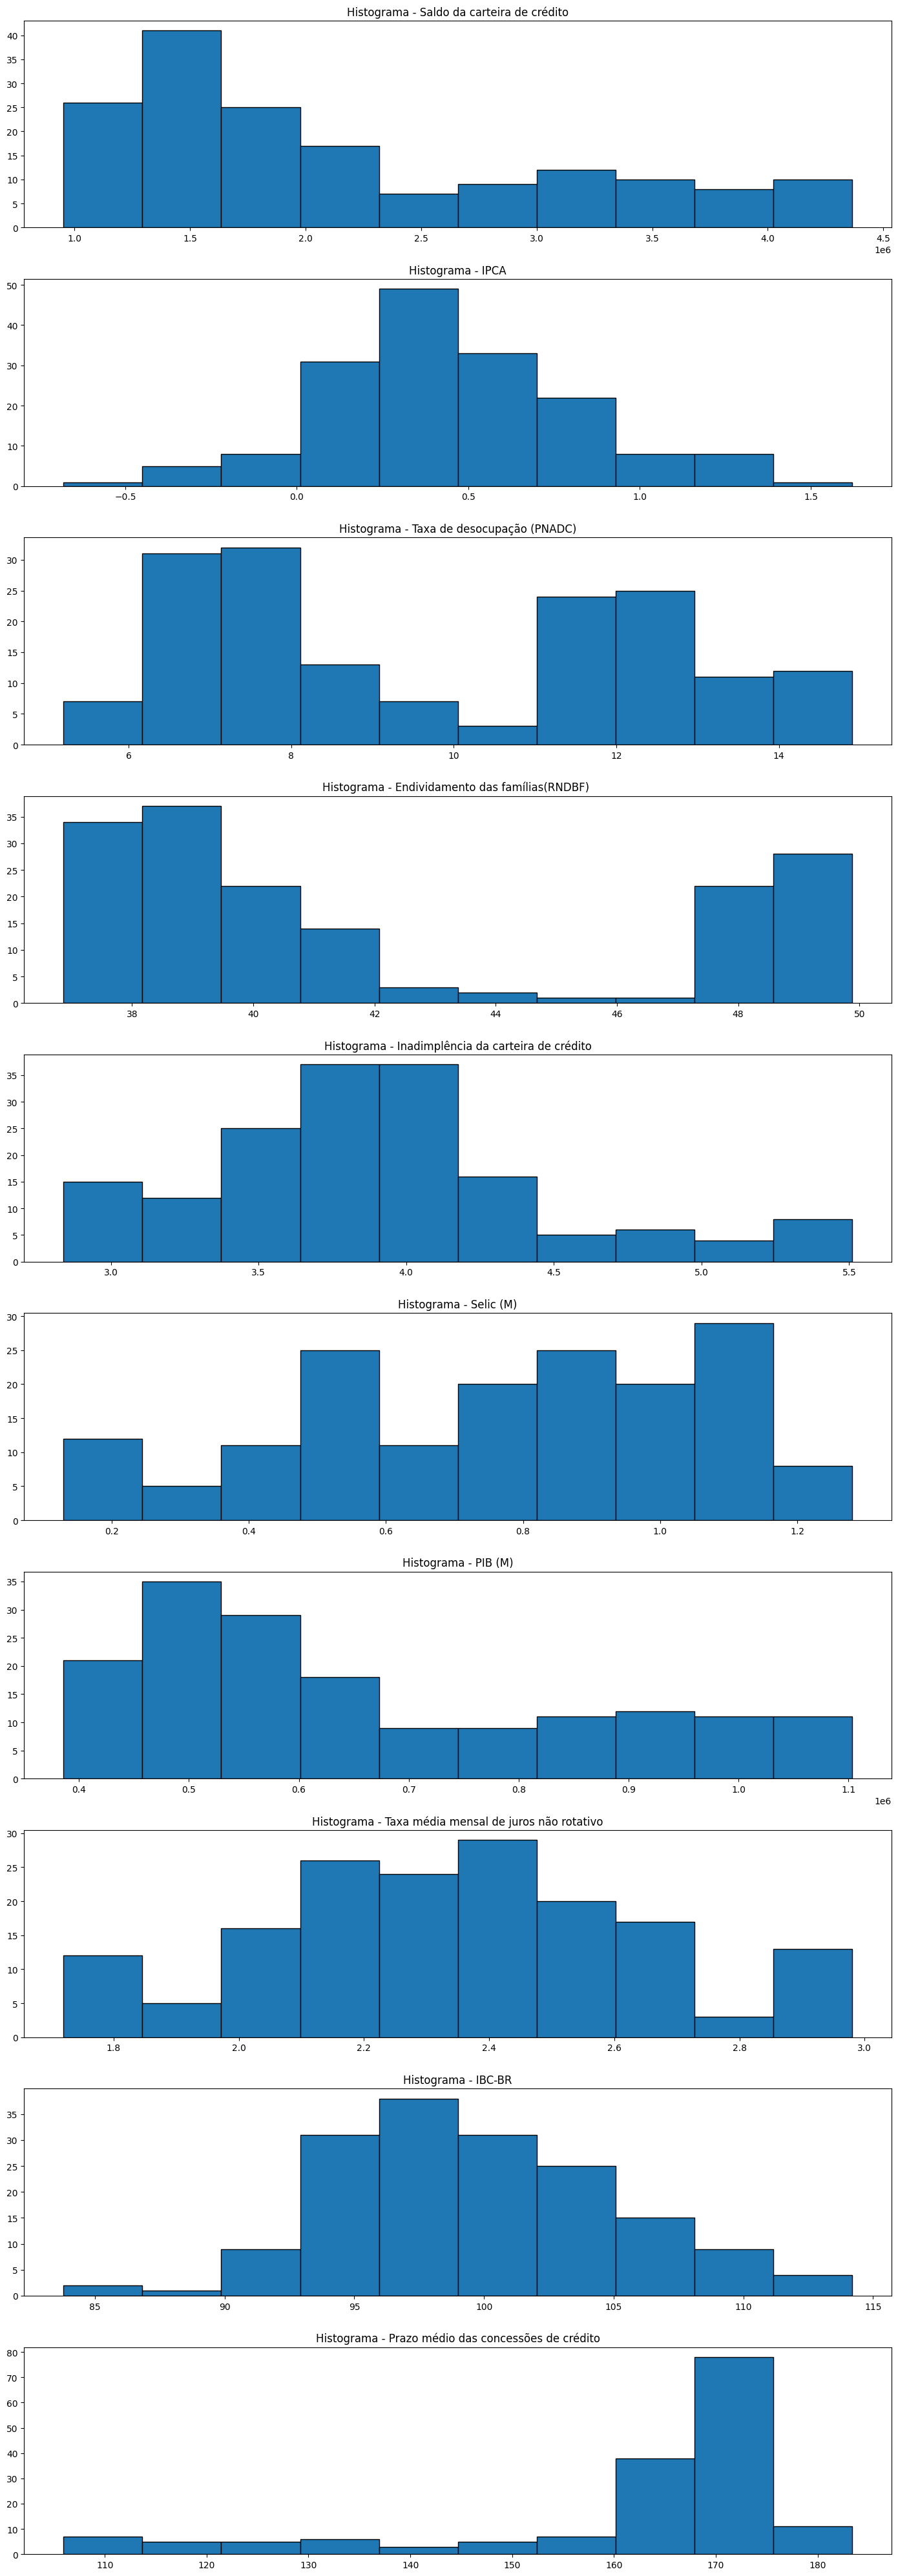

In [9]:
fig, ax = plt.subplots(len(df.columns), 1, figsize=(14, 4 * len(df.columns)))
for axes, num in zip(ax, df.columns):
    axes.hist(df[num], edgecolor='black')
    axes.set_title(f'Histograma - {num}')
    fig.tight_layout()
    fig.show()

C:\Users\souza\AppData\Local\Temp\ipykernel_19696\2491210720.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


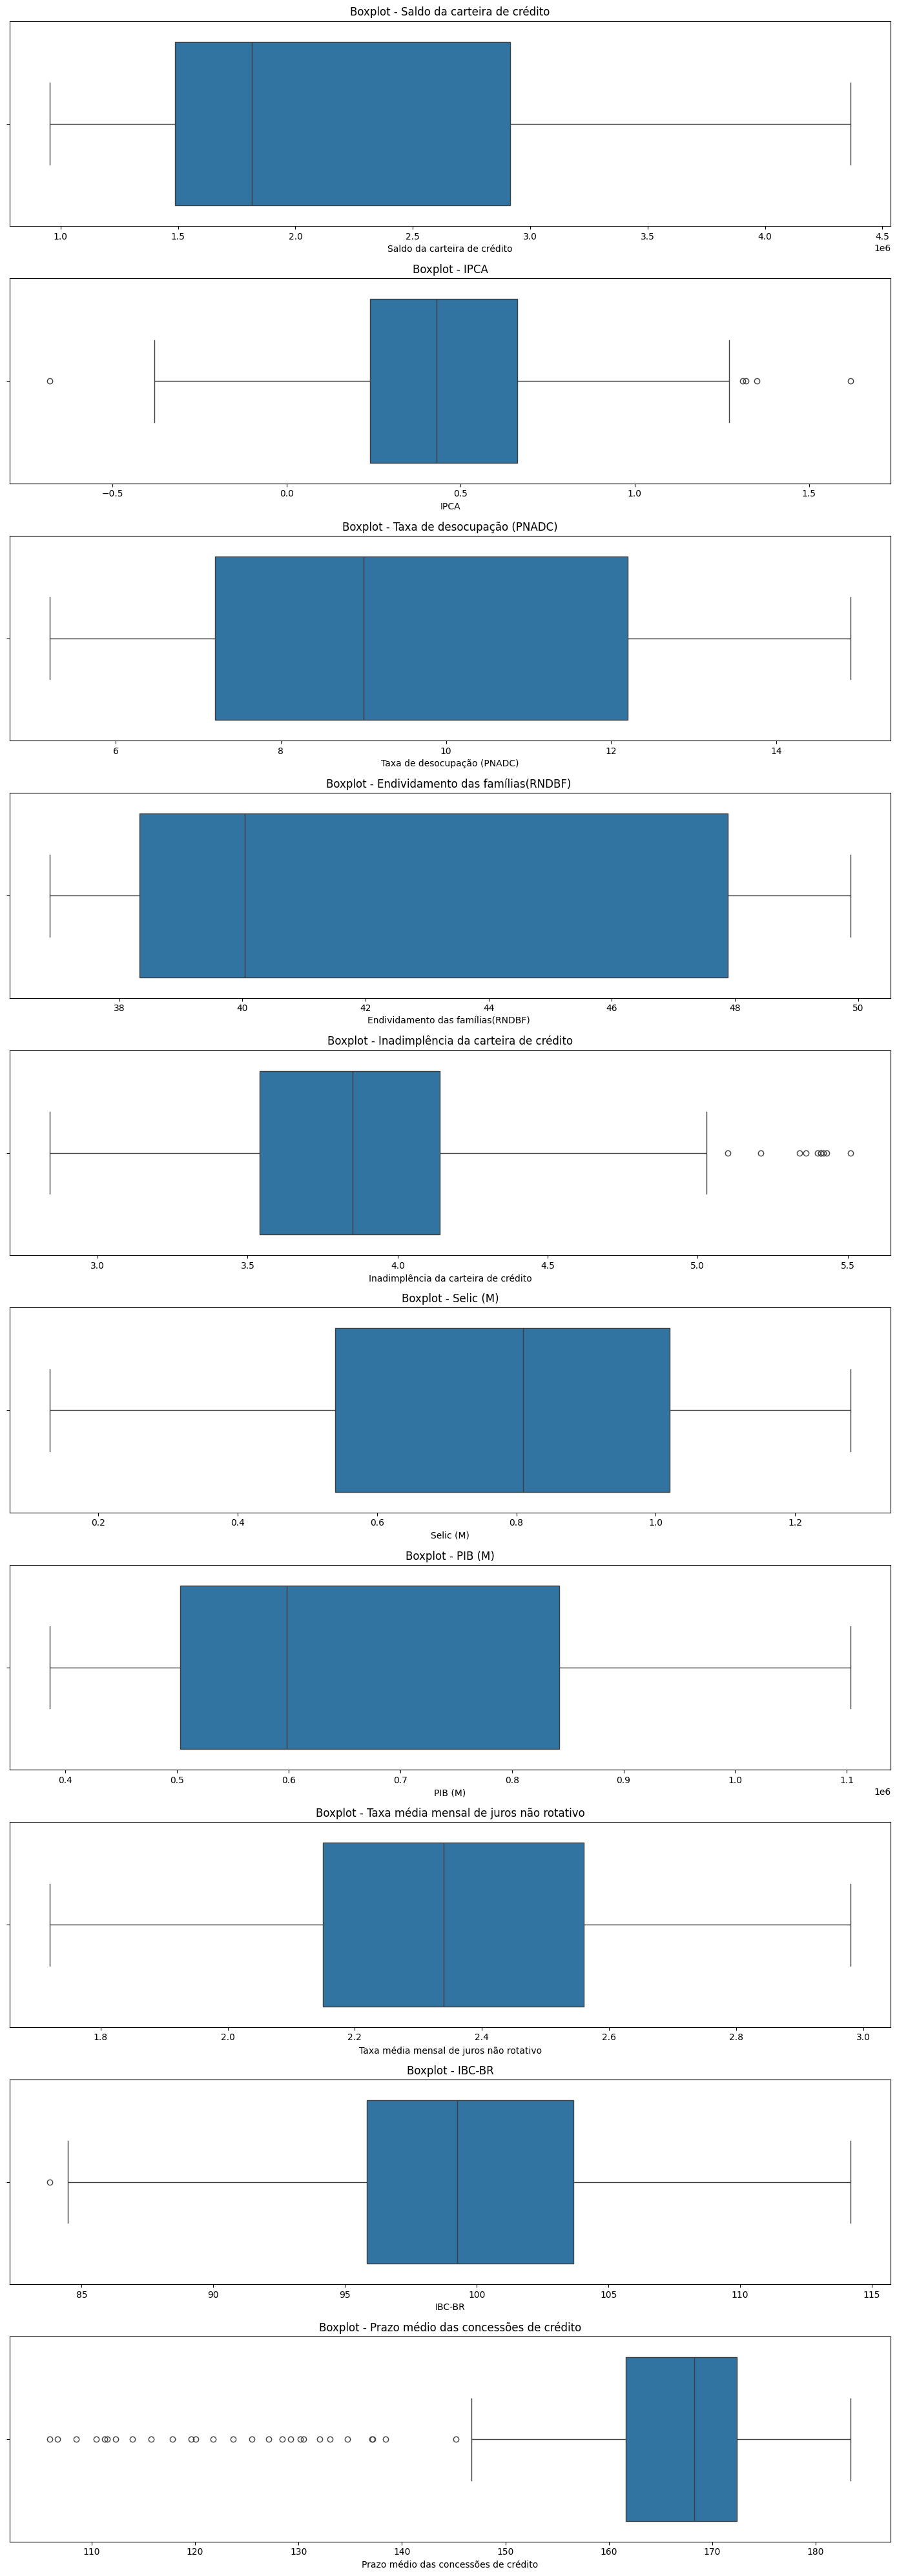

In [10]:
fig, ax = plt.subplots(len(df.columns), 1, figsize=(14, 4 * len(df.columns)))
for axes, box in zip(ax, df.columns):
    sns.boxplot(x=df[box], ax=axes)
    axes.set_title(f'Boxplot - {box}')
fig.tight_layout()
fig.show()

C:\Users\souza\AppData\Local\Temp\ipykernel_19696\478204351.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


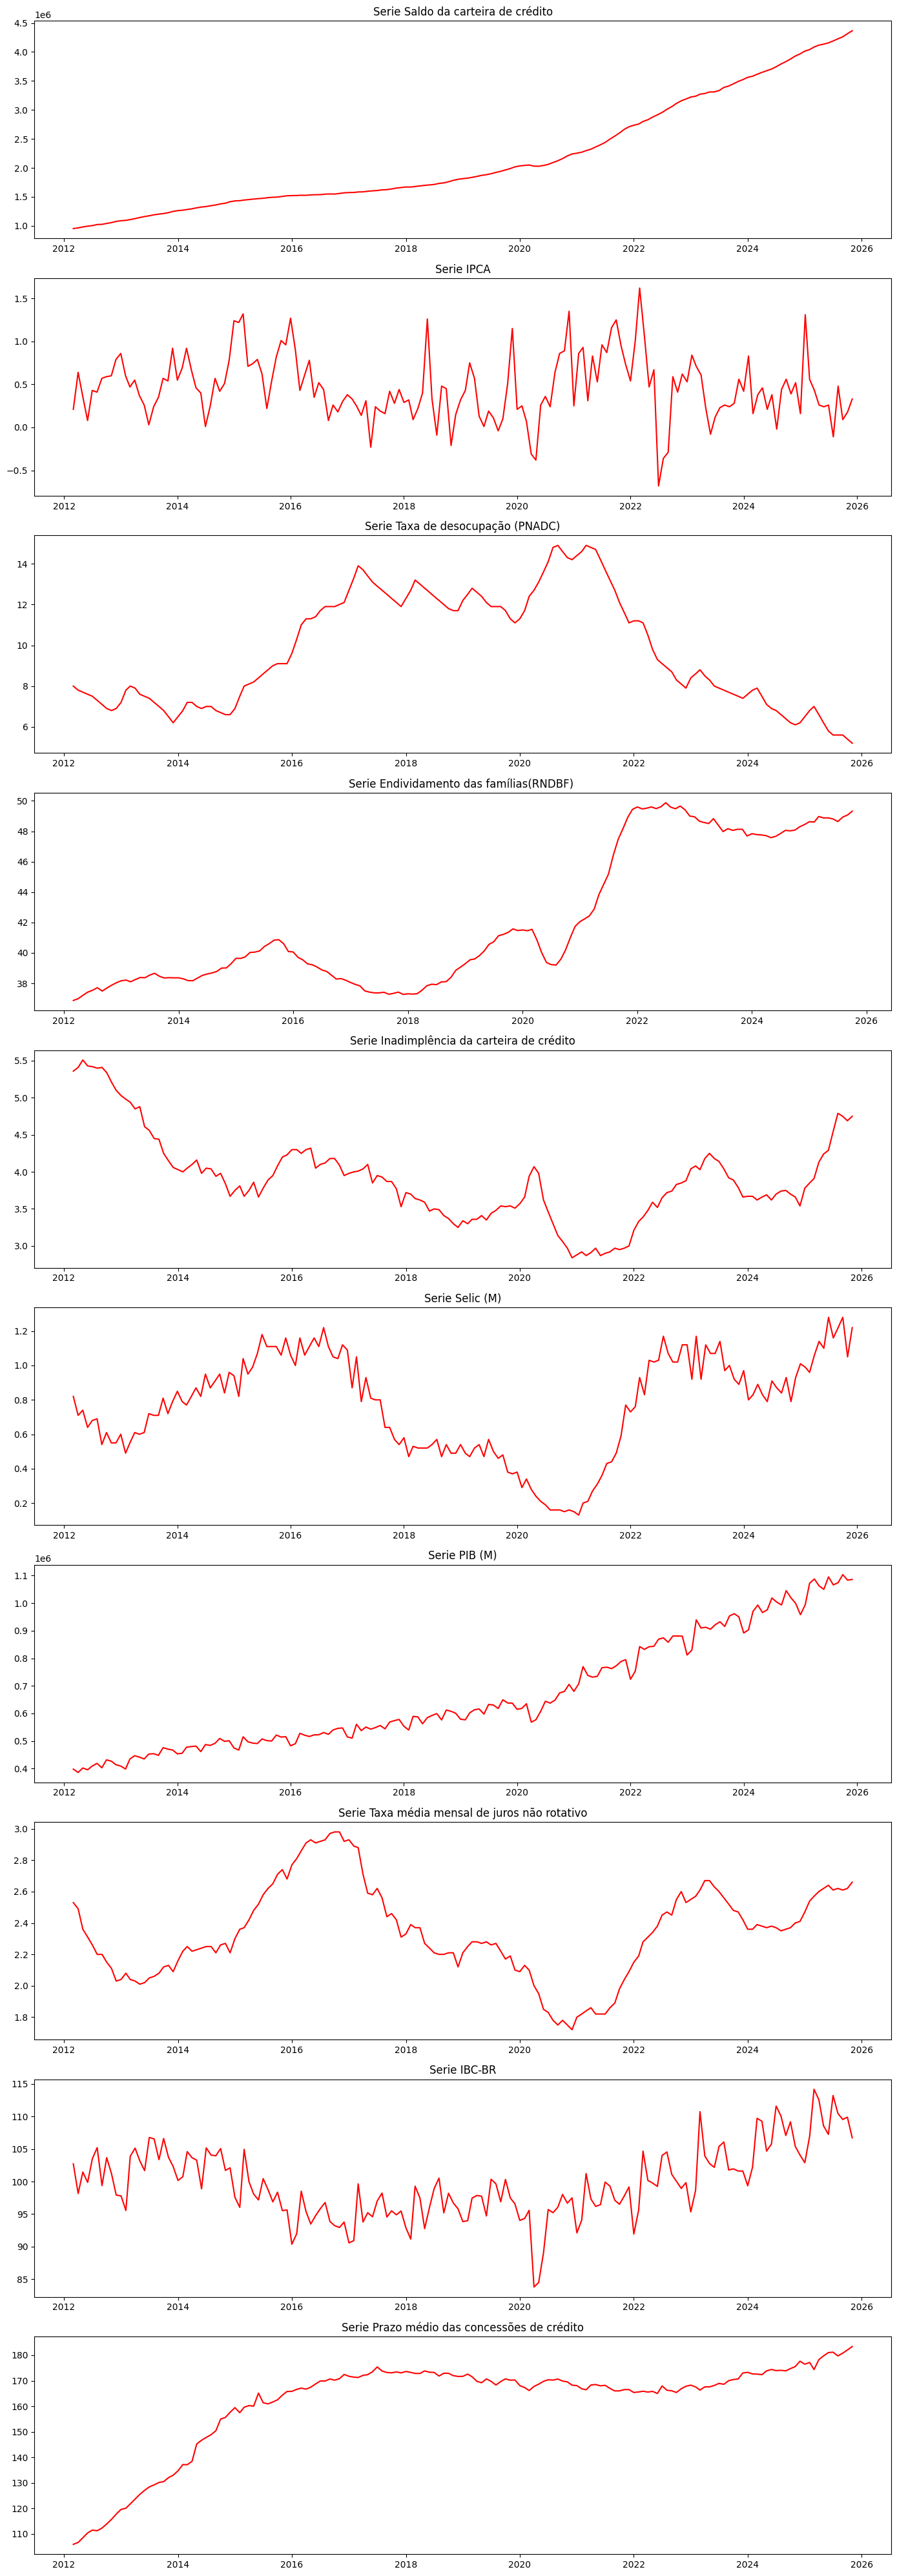

In [11]:
fig, ax = plt.subplots(len(df.columns), 1, figsize=(14, 4 * len(df.columns)))
for axes, plot in zip(ax, df.columns):
    axes.plot(df[plot], color='red')
    axes.set_title(f'Serie {plot}')
    #ig.legend()
    fig.tight_layout()
    fig.show()

Estudo de decomposição de series 


Sazonalidade:
            Saldo da carteira de crédito  IPCA  Taxa de desocupação (PNADC)  \
data                                                                          
2012-03-01                           NaN   NaN                          NaN   
2012-04-01                       11683.0  0.43                         -0.2   
2012-05-01                       15974.0 -0.28                         -0.1   
2012-06-01                       13309.0 -0.28                         -0.1   
2012-07-01                       10047.0  0.35                         -0.1   
...                                  ...   ...                          ...   
2025-08-01                       37991.0 -0.37                          0.0   
2025-09-01                       33722.0  0.59                          0.0   
2025-10-01                       54665.0 -0.39                         -0.2   
2025-11-01                       50395.0  0.09                         -0.2   
2025-12-01                           

C:\Users\souza\credit-portfolio\src\analytics\serie_decomposer.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


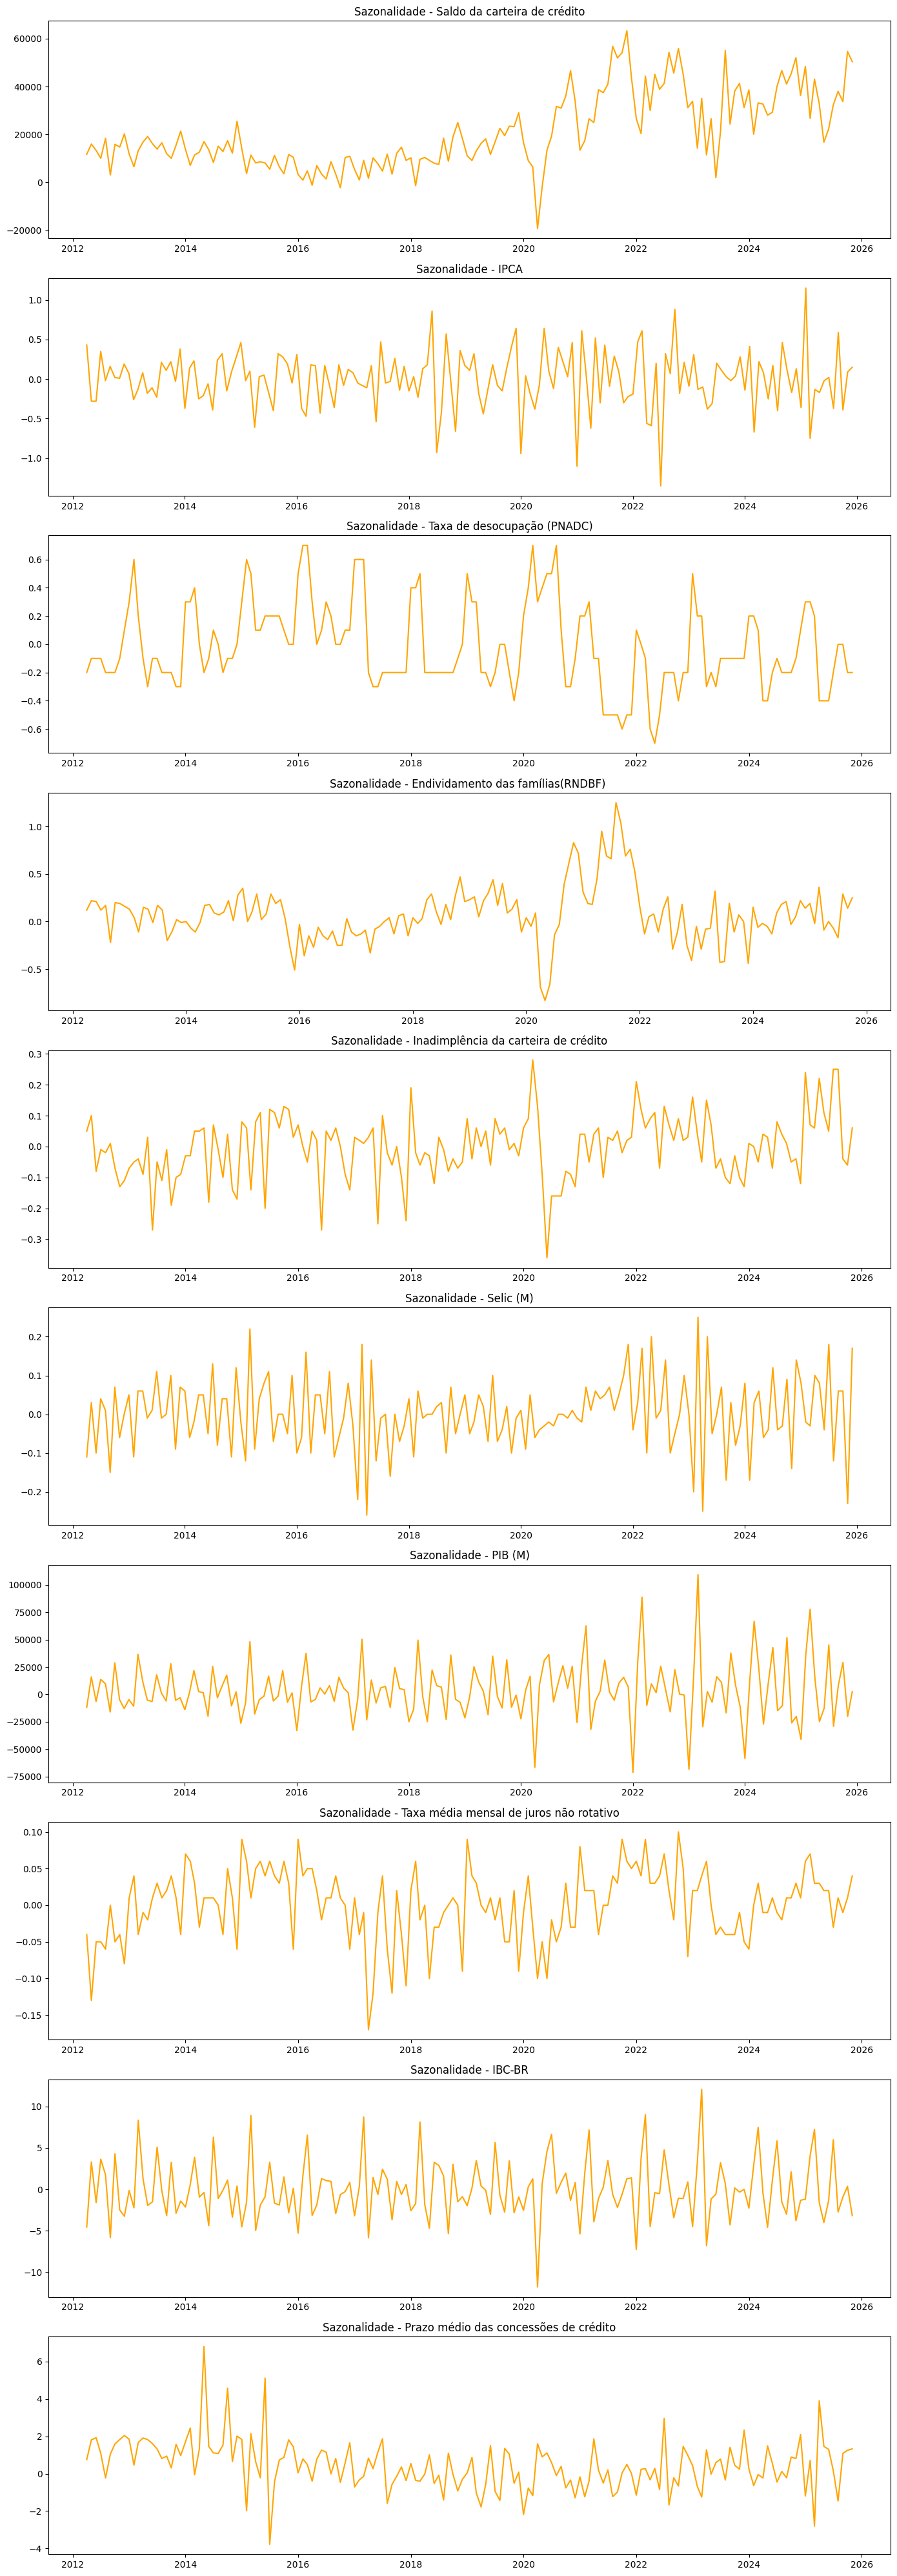

In [12]:
serie_dec = Serie_Decomposer(df)
serie_dec.sazo()


Média movel para janela de 11 meses:
            Saldo da carteira de crédito      IPCA  \
data                                                 
2012-03-01                           NaN       NaN   
2012-04-01                           NaN       NaN   
2012-05-01                           NaN       NaN   
2012-06-01                           NaN       NaN   
2012-07-01                           NaN       NaN   
...                                  ...       ...   
2025-08-01                  4.066399e+06  0.416364   
2025-09-01                  4.101184e+06  0.409091   
2025-10-01                  4.136202e+06  0.381818   
2025-11-01                  4.172504e+06  0.350909   
2025-12-01                           NaN  0.366364   

            Taxa de desocupação (PNADC)  Endividamento das famílias(RNDBF)   \
data                                                                          
2012-03-01                          NaN                                 NaN   
2012-04-01            

C:\Users\souza\credit-portfolio\src\analytics\serie_decomposer.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


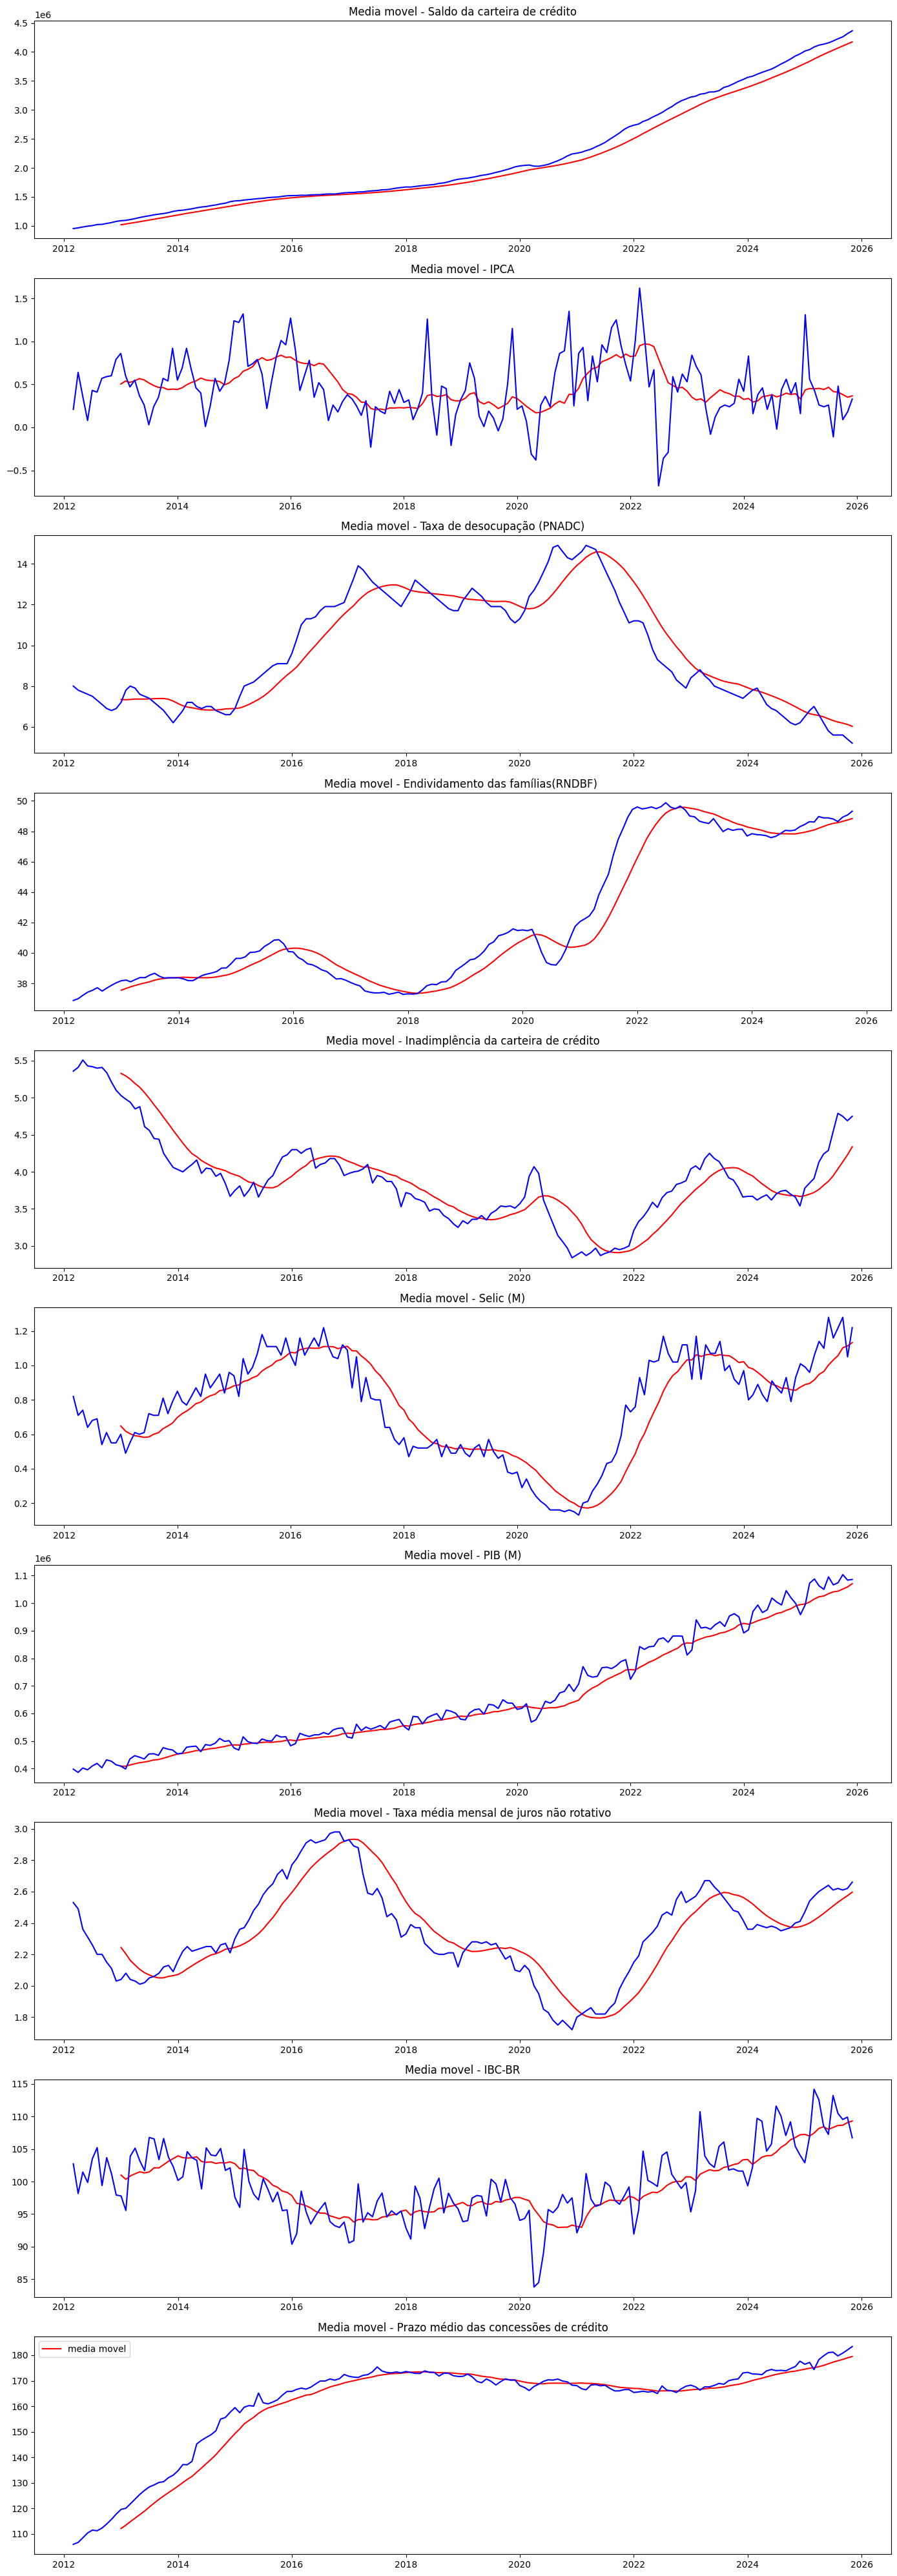

In [13]:
serie_dec.move_avg(11)

In [14]:
df_vol = df.rolling(12).std() # analisando volatidade em uma janela de 12 meses 

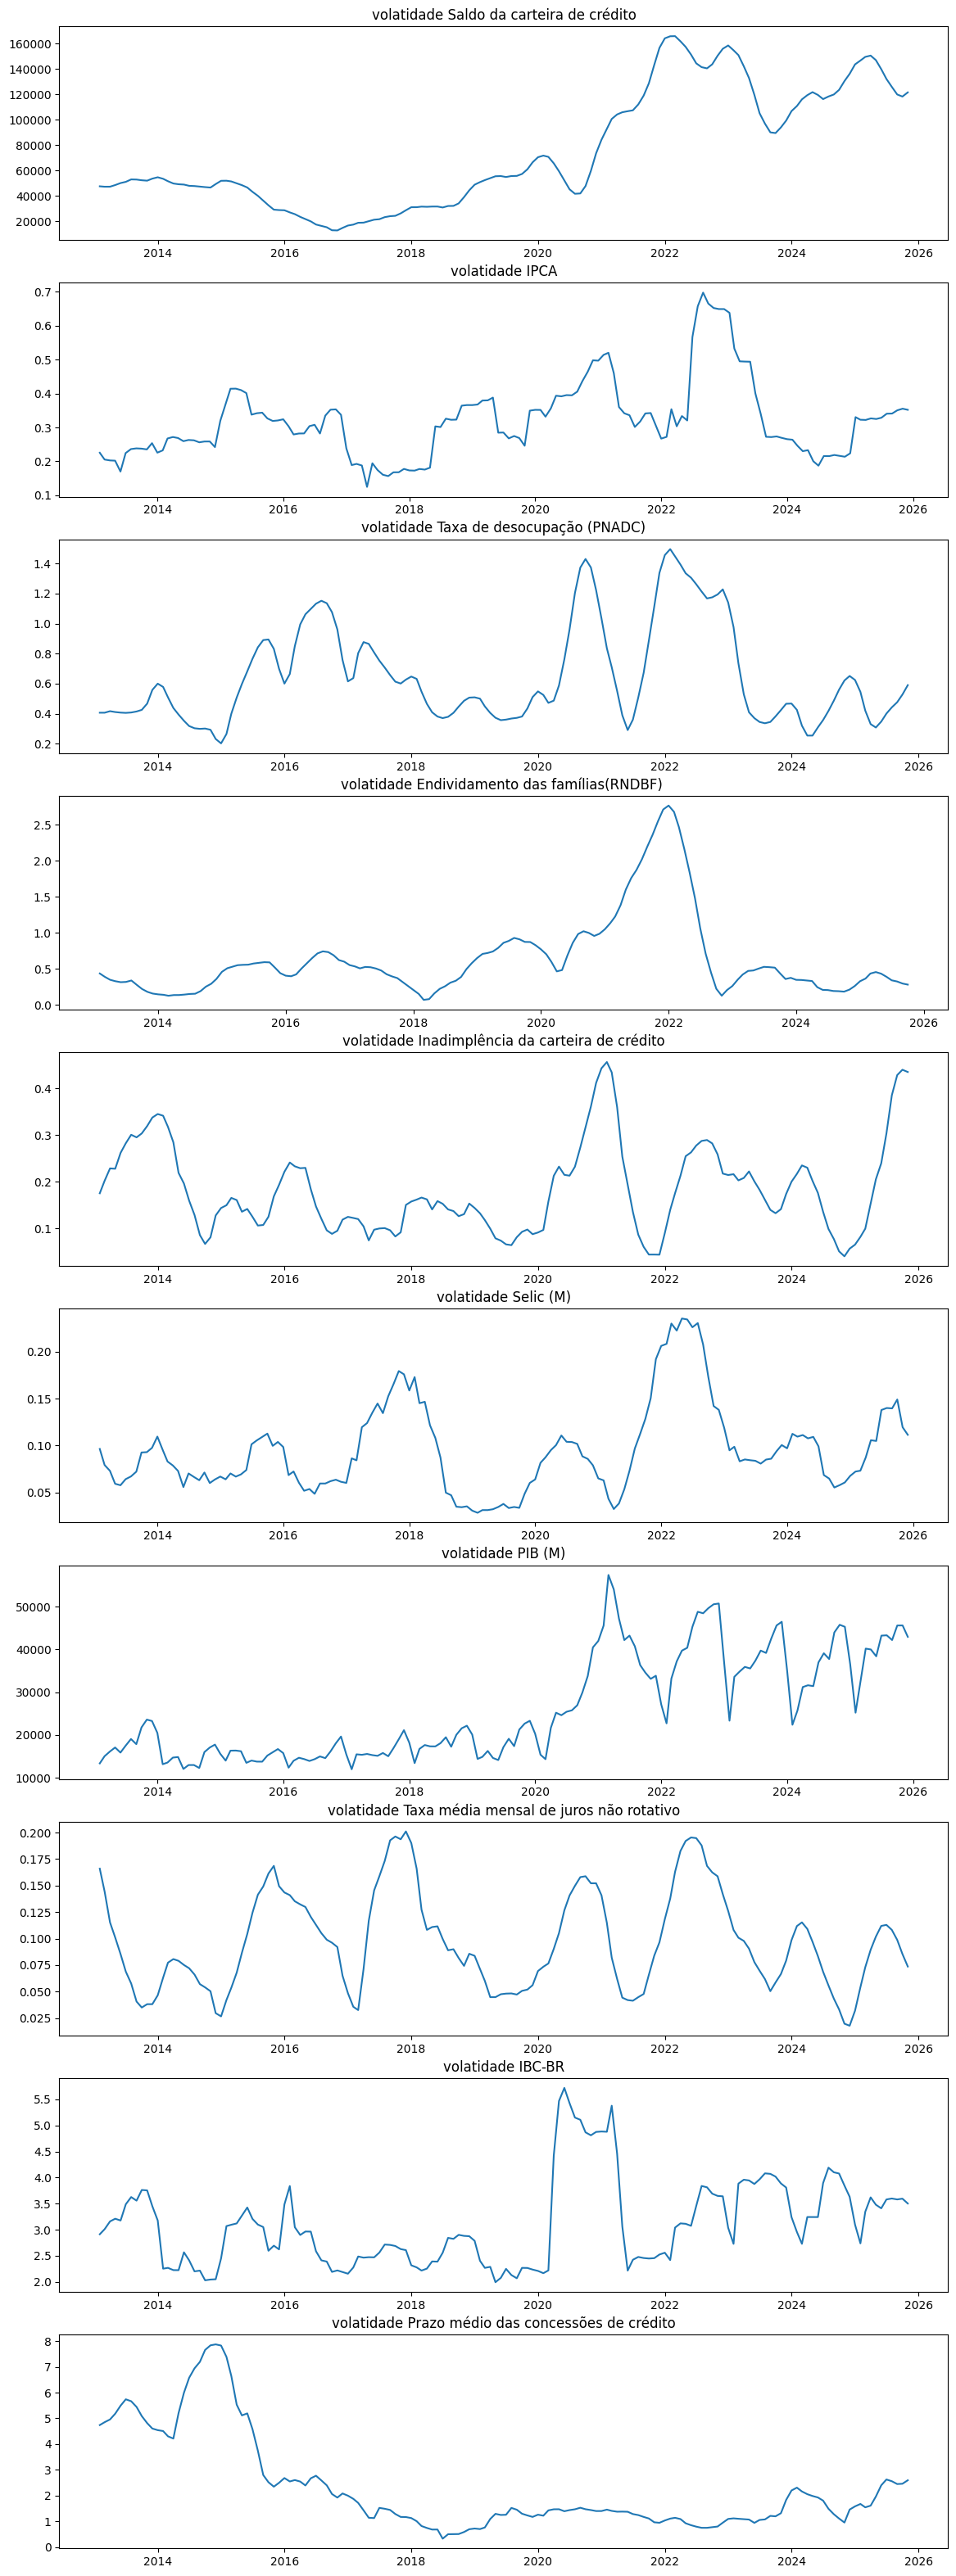

In [15]:
fig, ax = plt.subplots(len(df.columns), 1, figsize=(14, 4 * len(df.columns)))
for axes, vol in zip(ax, df_vol.columns):
    axes.plot(df_vol[vol])
    axes.set_title(f'volatidade {vol}')

In [16]:
def volatility(data:pd.DataFrame):
    df_vol = pd.DataFrame()
    data_ = data.copy()
    data_ = data_.dropna()
    df_vol['var'] = data_.apply(np.var)
    pct_list = []
    for pct_change in data_.columns:
        ff = data_[pct_change].pct_change(fill_method=None, periods=12).mean()
        pct_list.append(ff)
    df_vol['pct_var'] = pct_list
    df_vol = df_vol.sort_index()
    return df_vol

In [17]:
df_cluster = volatility(df)
display(df_cluster)

,var,pct_var
Endividamento das famílias(RNDBF),2.096734e+01,0.022262
IBC-BR,2.922608e+01,0.007001
IPCA,1.397427e-01,0.554302
Inadimplência da carteira de crédito,3.449462e-01,-0.009414
PIB (M),4.012549e+10,0.078516
Prazo médio das concessões de crédito,3.376537e+02,0.038594
Saldo da carteira de crédito,8.955456e+11,0.117157
Selic (M),8.690705e-02,0.231119
Taxa de desocupação (PNADC),7.537873e+00,0.002116
Taxa média mensal de juros não rotativo,8.830840e-02,0.020191


O calculo da variação e do percentual médio da variaçao foi dada através do olhar anual do  

Teste do cotovelo para separação de clusters


cluster 2: inertia: 0.8520914486192575

cluster 3: inertia: 0.13727832843479526

cluster 4: inertia: 0.017694326214146124

cluster 5: inertia: 0.005682720353813487

cluster 6: inertia: 0.0010866686278920288

cluster 7: inertia: 0.0009186025793291072

cluster 8: inertia: 4.429796973999189e-05

cluster 9: inertia: 6.754916432810525e-06

cluster 10: inertia: 0.0


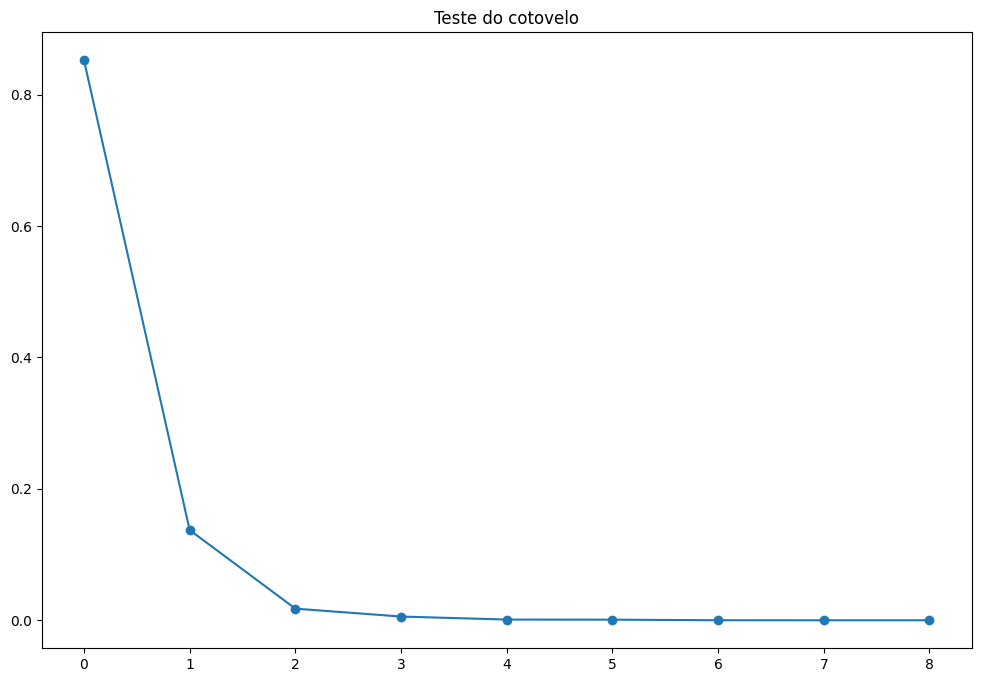

In [18]:
X_cluster = df_cluster[['var', 'pct_var']]
X_cluster = MinMaxScaler().fit_transform(X_cluster)
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X_cluster)
    print()
    print(f'cluster {i}: inertia: {kmeans.inertia_}')
    print('==='*50)

    inertia.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.title('Teste do cotovelo')
plt.plot(inertia, marker='o')

Atraves da analise grafica decidi separar em 3 grupos distintos

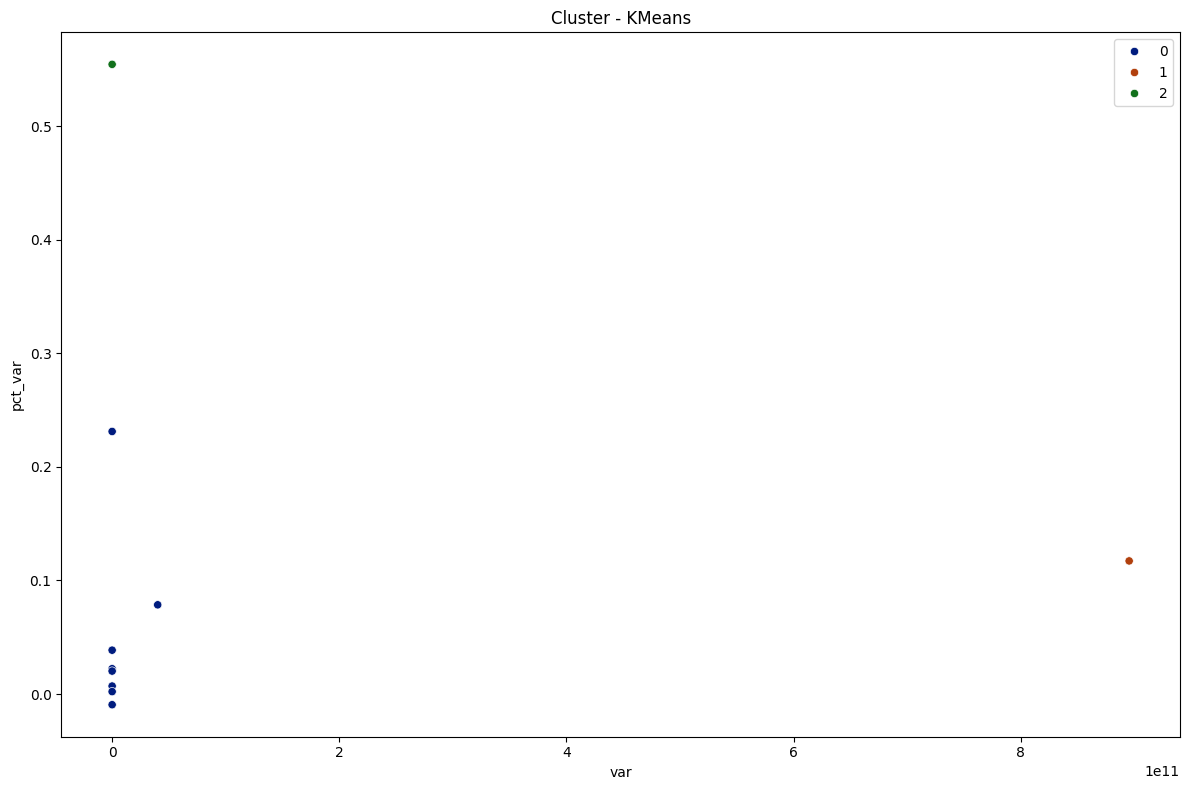

In [19]:
kmeans_ = KMeans(n_clusters=3, random_state=42).fit(X_cluster)
plt.figure(figsize=(12,8))
plt.title('Cluster - KMeans')
sns.scatterplot(data=df_cluster, x='var', y='pct_var', hue=kmeans_.labels_, palette='dark')
plt.tight_layout()
plt.show()

In [20]:
df_cluster['cluster'] = kmeans_.labels_
display(df_cluster)

,var,pct_var,cluster
Endividamento das famílias(RNDBF),2.096734e+01,0.022262,0
IBC-BR,2.922608e+01,0.007001,0
IPCA,1.397427e-01,0.554302,2
Inadimplência da carteira de crédito,3.449462e-01,-0.009414,0
PIB (M),4.012549e+10,0.078516,0
Prazo médio das concessões de crédito,3.376537e+02,0.038594,0
Saldo da carteira de crédito,8.955456e+11,0.117157,1
Selic (M),8.690705e-02,0.231119,0
Taxa de desocupação (PNADC),7.537873e+00,0.002116,0
Taxa média mensal de juros não rotativo,8.830840e-02,0.020191,0


Grupo 0:

Possui a maior parte das variáveis. Esse agrupamento pertence a categoria de variaveis que possuem variancia e volatidade controlada, baixa dispersão e comportamento estavel ao longo do tempo. 

as variaveis são: 

- Endividamento das famílias(RNDBF)	

- IBC-BR 

- Inadimplência da carteira de crédito

- PIB (M)

- Prazo médio das concessões de crédito	

- Selic (M)	

- Taxa de desocupação (PNADC)

- Taxa média mensal de juros não rotativo	

Grupo 1: 

Apenas 1 variavel pertence a esse grupo. Devido a sua escala extremamente elevada e dinamica propria, ela se diferencia das demais, justificando a separação. 

- Saldo da carteira de crédito	


Grupo 2: 

- O IPCA aparece isolado por apresentar alta variação percentual relativa, típica de um índice nominal sensível a choques de curto prazo, regimes inflacionários e mudanças de política monetária.

In [21]:
print('==='*50)
for adfuller_test in df.columns:
    p_value = adfuller(df[adfuller_test].dropna())
    if p_value[1] > 0.05:
        print()
        print(f'Hipotese nula de estacionaridade rejeitada para a coluna {adfuller_test} | p_valor: {p_value[1]}. ')
        print()    
    else:
        print(f'a serie  {adfuller_test} é estacionaria | p_valor: {p_value[1]}')
        print(f'variaveis estacionarias: {adfuller_test}')
print('==='*50)


Hipotese nula de estacionaridade rejeitada para a coluna Saldo da carteira de crédito | p_valor: 0.9973341747731925. 

a serie  IPCA é estacionaria | p_valor: 5.641358772170294e-10
variaveis estacionarias: IPCA

Hipotese nula de estacionaridade rejeitada para a coluna Taxa de desocupação (PNADC) | p_valor: 0.6293759734761425. 


Hipotese nula de estacionaridade rejeitada para a coluna Endividamento das famílias(RNDBF)  | p_valor: 0.8761496755513845. 


Hipotese nula de estacionaridade rejeitada para a coluna Inadimplência da carteira de crédito | p_valor: 0.14321195966785055. 


Hipotese nula de estacionaridade rejeitada para a coluna Selic (M) | p_valor: 0.08688488806770306. 


Hipotese nula de estacionaridade rejeitada para a coluna PIB (M) | p_valor: 0.9983233014101712. 

a serie  Taxa média mensal de juros não rotativo é estacionaria | p_valor: 0.03330130875096917
variaveis estacionarias: Taxa média mensal de juros não rotativo

Hipotese nula de estacionaridade rejeitada para a co

C:\Users\souza\AppData\Local\Temp\ipykernel_19696\425204766.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


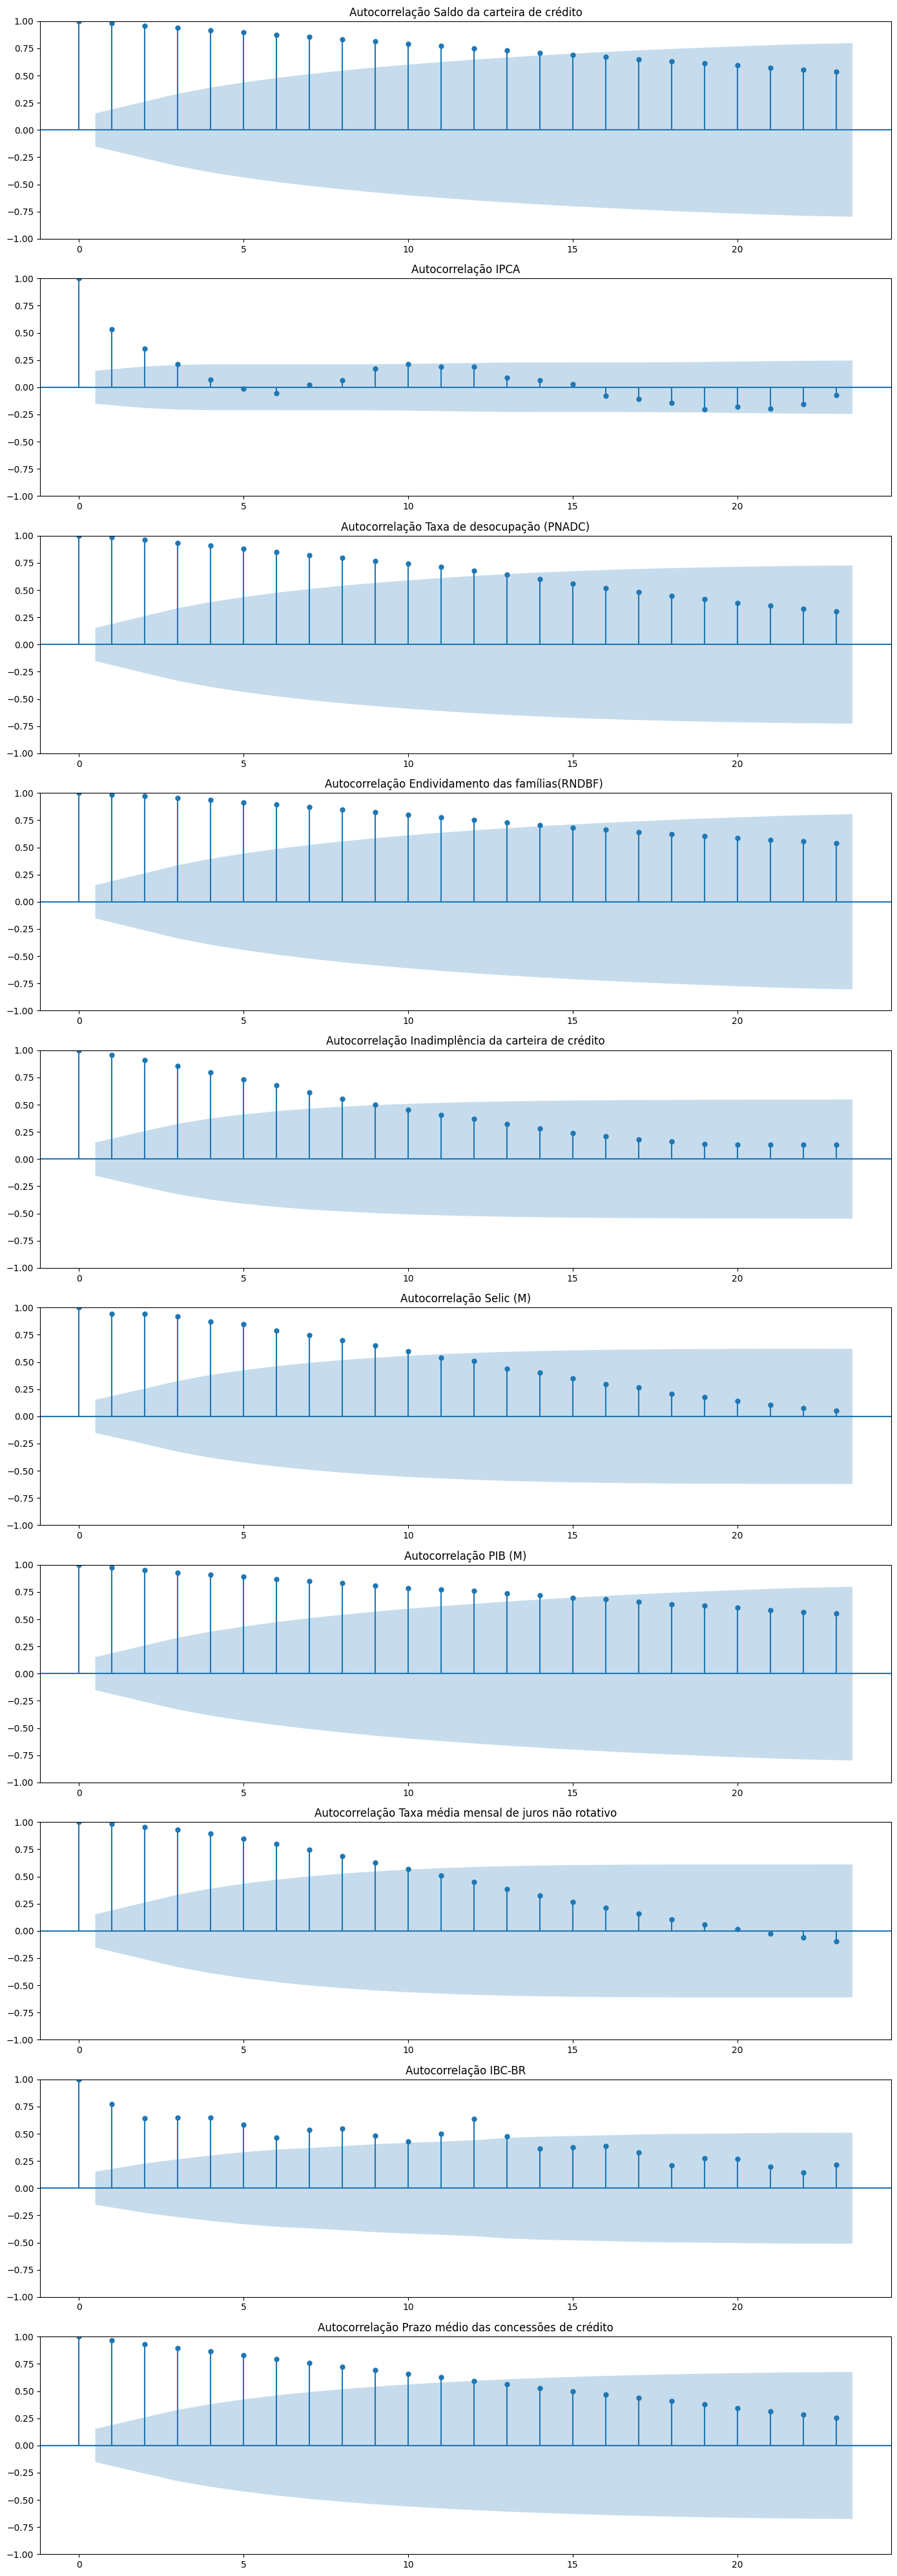

In [22]:
fig, ax = plt.subplots(len(df.columns), 1, figsize=(14, 4 * len(df.columns)))
for axes, acf in zip(ax, df.columns):
    plot_acf(df[acf].dropna(), ax=axes)
    axes.set_title(f'Autocorrelação {acf}')
    fig.tight_layout()
    fig.show()

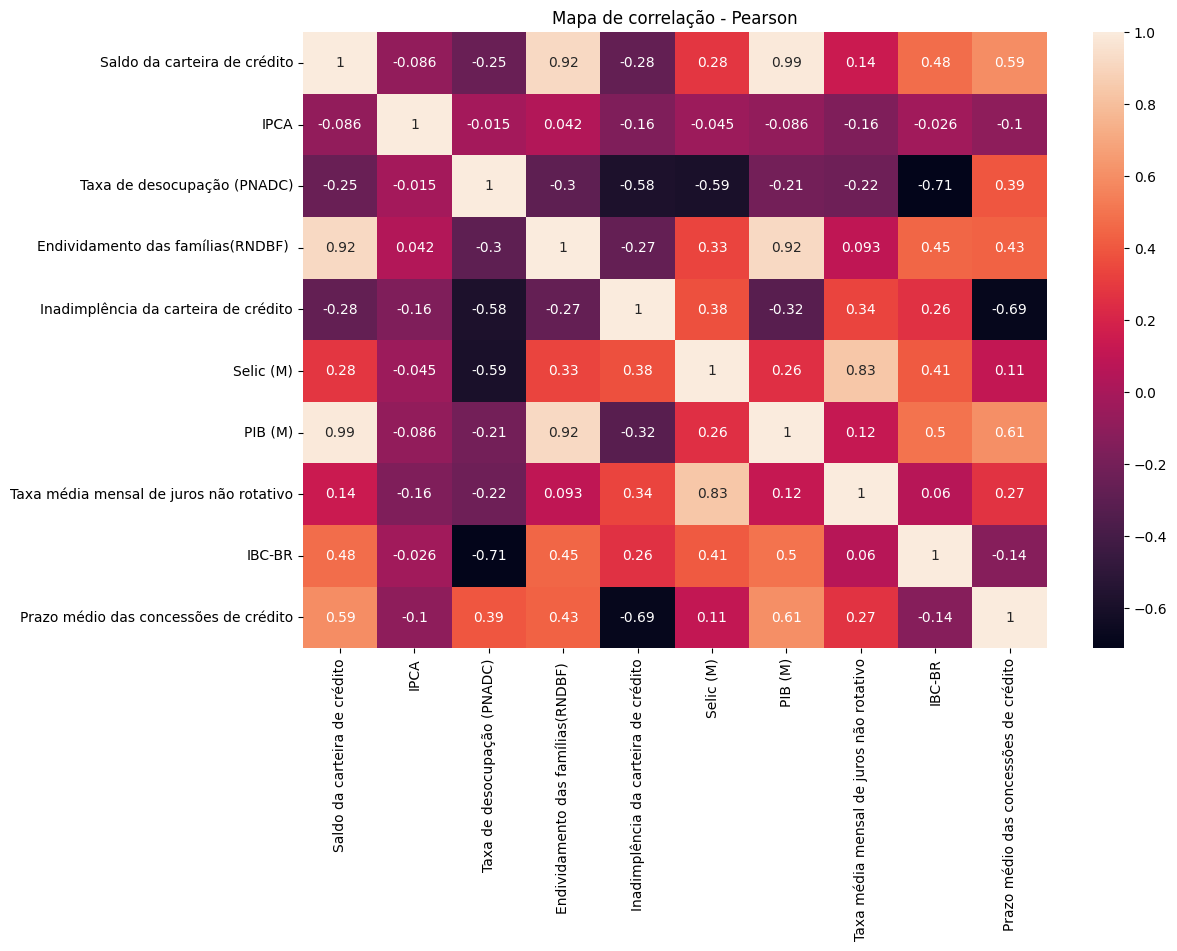

In [23]:
plt.figure(figsize=(12,8))
plt.title('Mapa de correlação - Pearson')
sns.heatmap(df.dropna().corr(), annot=True)
#plt.tight_layout()
plt.show()

Correlaçoes altas:

- O saldo da carteira de crédito esta sob influencia (alta) do endividamento das familias. 

- por que isso se da? me parece contra-intuitivo. Porem, pode esta relacionado com modelos de renegociaçao de dividas. Ou seja, ainda é liberado da carteira de crédito valores para recuperaçao do crédito através desses cenários. 

- Ainda na variavel alvo, a mesma esta muito correlacionada com a produçao bruta do país (PIB). Com isso, quanto mais o Brasil produz, maior é seu saldo para crédito. 

Correlaçoes medianas: 

- o indice que mostra o quao aquecida esta a economia (IBC-br) esta com um percentual de 0.48 correlacionado com o saldo da carteira de crédito. Com isso, nao descarto uma relaçao, ainda que nao forte, mas existente. 

- O mesmo se da ao prazo de conseçoes de crédito, com percentual de 0.59.

Correlaçoes baixas: 

- selic x saldo da carteira. Mostra que a taxa de juros basica do país nao tem influencia forte no saldo da carteira de crédito. Porem, ainda é significativa 


Correlaçoes negativas: 

As correlações negativas indicam relações inversas entre as variáveis, refletindo mecanismos econômicos esperados. variaveis negativas crescem, saldo diminui, como é o caso do desemprego

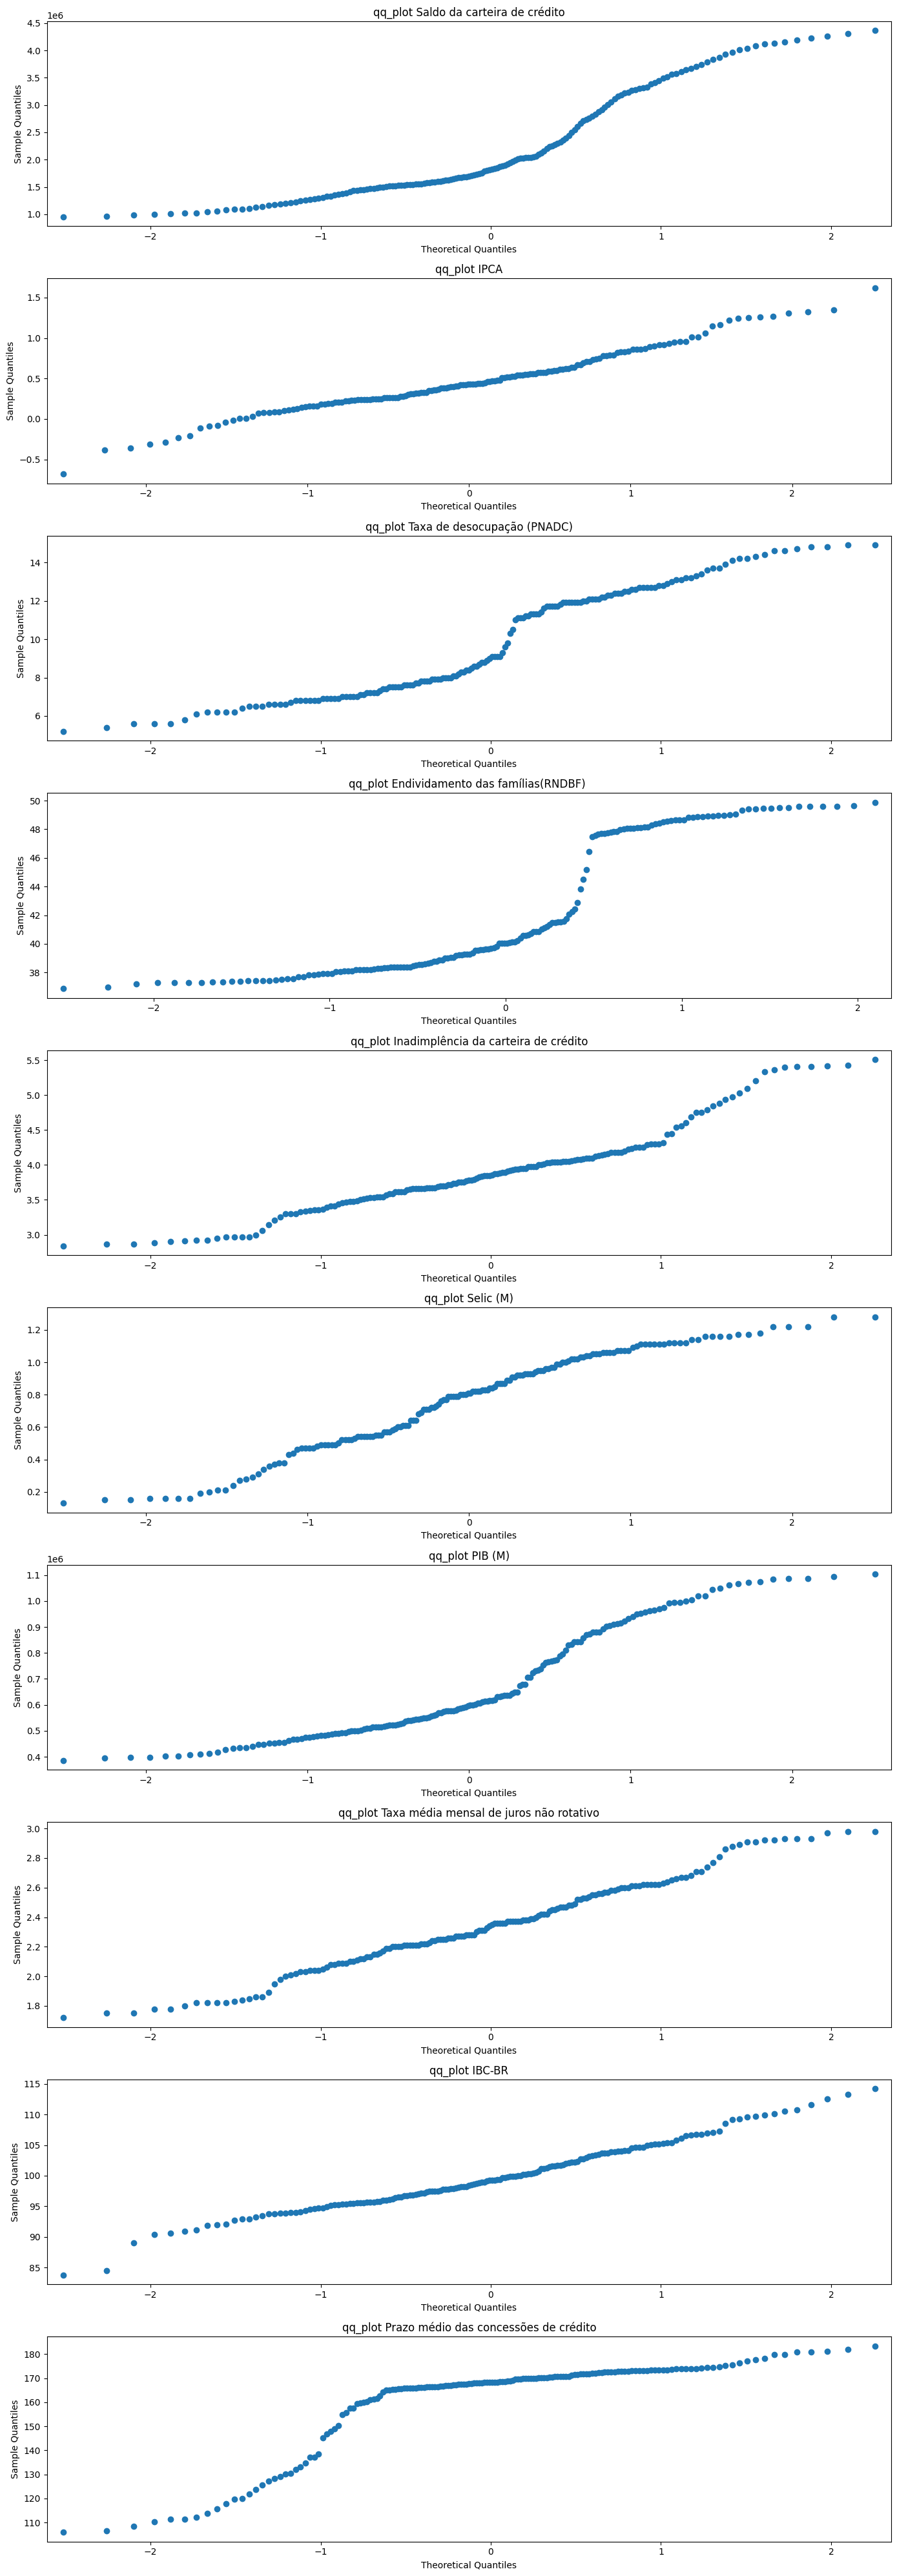

In [24]:
fig, ax = plt.subplots(len(df.columns), 1, figsize=(14, 4 * len(df.columns)))
for axes, plot_qq in zip(ax, df.columns):
    sm.qqplot(df[plot_qq], ax=axes)
    axes.set_title(f'qq_plot {plot_qq}')
    fig.tight_layout()
    

In [25]:
X_vif = df.dropna()

In [26]:
vif_df = pd.DataFrame()
X_vif = sm.add_constant(X_vif)
vif_df['features'] = X_vif.columns
vif_df['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

In [29]:
vif_df.sort_values(by='VIF', ascending=False)

,features,VIF
0,const,9486.285732
7,PIB (M),180.353914
1,Saldo da carteira de crédito,153.543091
4,Endividamento das famílias(RNDBF),21.746131
10,Prazo médio das concessões de crédito,16.435809
6,Selic (M),15.803510
8,Taxa média mensal de juros não rotativo,11.386644
5,Inadimplência da carteira de crédito,8.647964
3,Taxa de desocupação (PNADC),8.102985
9,IBC-BR,7.558348


In [32]:
df_train = df.dropna()
X = df_train.drop('Saldo da carteira de crédito', axis=1)
y = df_train['Saldo da carteira de crédito']
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Saldo da carteira de crédito   R-squared:                       0.993
Model:                                      OLS   Adj. R-squared:                  0.993
Method:                           Least Squares   F-statistic:                     2610.
Date:                          Mon, 26 Jan 2026   Prob (F-statistic):          1.70e-163
Time:                                  11:55:24   Log-Likelihood:                -2076.6
No. Observations:                           164   AIC:                             4173.
Df Residuals:                               154   BIC:                             4204.
Df Model:                                     9                                         
Covariance Type:                      nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--

criar classe que plota métricas e explicabilidade para modelos baseados em arvore ML